# Deutsch Algorithm


1. Imagine we have a function f that takes in a bit either 0 or 1 and returns a bit. 

2. It is given to us as a sort of Black Box. We cannot look inside this function to see what it does or try to understand how it works.

3. The only thing we can do is send in a bit (input bit) and read the output bit.

4. Our task is to find out if this function $f$ is constant or balanced

5. If it is constant function, then output is same regardless of inputs. $f(x=0) = 0, f(x=1) = 0$. $f(x=0) = 1, f(x=1) = 1$ 

6. If it is balanced function, then returns 0 for half and returns 1 for the other half of inputs. Example is a not gate $X$, 
   because $X(0) = 1$ and $X(1) = 0$  

7. To determing the type of function, we use equality. 
   If constant function then $f(0)=f(1)$.
   If balanced function then $f(0) \neq f(1)$ 

8. Classical computers need to do two queries for the above case in order to find constant or balanced function. Quantum computers, however, only require one query to find constant or balanced function and this is quantum advantage. 

9. $|x>|y> {\xrightarrow{U_f}} |x>|y{\oplus}f(x)>$. $U_f$ is a quantum oracle. It is a reversible quantum gate. The input function is $x$ qubit(s), and $y$ qubit is used to write the output of the function.

10. If $y=0$ then $|x>|0> {\xrightarrow{U_f}} |x>|0 {\oplus}f(x)> = |x>|f(x)>$. Measure the right most qubit that gives us the value of $f(x)$.

11. A special case of oracle is called phase oracle, where $|y> = |->$. In this case we have $|x>|-> {\xrightarrow{U_f}} {(-1)^{f(x)}}|x>|->$. Instead of the function output being applied to the target qubit in the case of $y=0$, a phase is applied to input qubit in the case of phase oracle. When $f(x)=0$, then $|x>|-> {\xrightarrow{U_f}}|x>|->$, and when $f(x)=1$, $|x>|-> {\xrightarrow{U_f}} -|x>|->$.

12. Querying a quantum oracle this way with the target qubit in $|->$ state is integral to many quantum algorithms. 

13. If constant function $f(0)=f(1)$, then measurement of first qubit gives us ${\pm}|0>$, if balanced function $f(0){\neq}f(1)$, then measurement of first qubit gives ${\pm}|1>$. 

14. If we measure 0 for the first qubit(s) associated with $x$ then $f(x)$ is constant. If we measure 1 for the first qubit(s) associated with $x$ then $f(x)$ is balanced. 

15. This algorithm showcases quantum supremacy in solving a task in one query as opposed to a classical computer taking multiple queries.


In [1]:
from qiskit import *
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit.extensions import UnitaryGate

%matplotlib inline

# Step One : Create a 2-qubit circuit


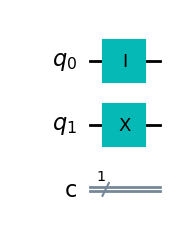

In [2]:
qc=QuantumCircuit(2,1)
qc.i(0)
qc.x(1)
display(qc.draw('mpl'))

# Step Two : Apply a Hadamard gate to all qubits


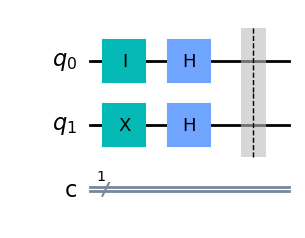

In [3]:
qc.h(0)
qc.h(1)
qc.barrier()
display(qc.draw('mpl'))

# Step Three : Apply CNOT gate. Use CNOT gate as an example for quantum oracle $U_f$. The oracle is in between the barriers


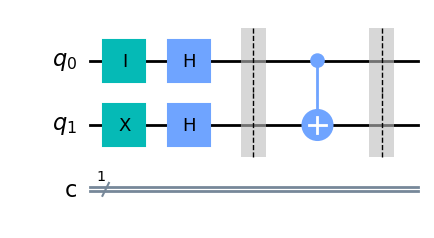

In [4]:
qc.cx(0,1)
qc.barrier()
display(qc.draw('mpl'))

# Step Four : Apply Hadamard gate to first qubit


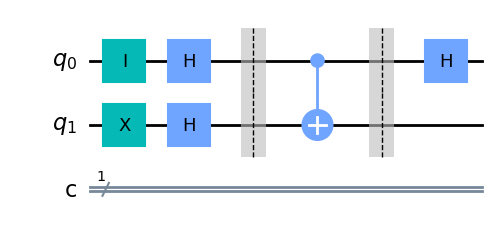

In [5]:
qc.h(0)
display(qc.draw('mpl'))

# Step Five : Measure the first qubit



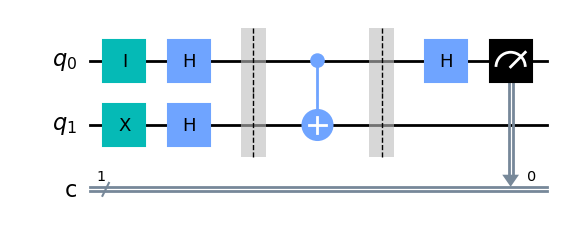

In [6]:
qc.measure(0,0)
display(qc.draw('mpl'))

# Step Six : Running it on a simulator to get noise free result


{'1': 1024}


/Users/priyabratasenapati/opt/miniconda3/envs/QuantumML2/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/priyabratasenapati/opt/miniconda3/envs/QuantumML2/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


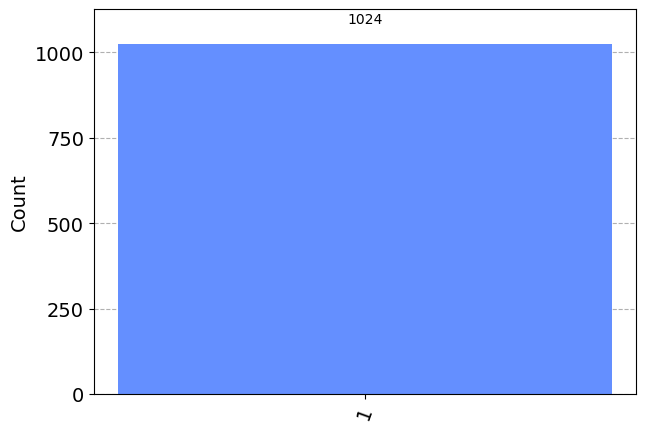

In [7]:
backend=Aer.get_backend('aer_simulator')
result=execute(qc,backend=backend,shots=1024).result()
counts=result.get_counts(qc)
print(counts)
plot_histogram(counts)

# Putting it all together

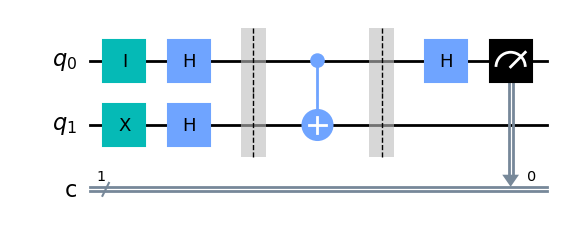

{'1': 1024}


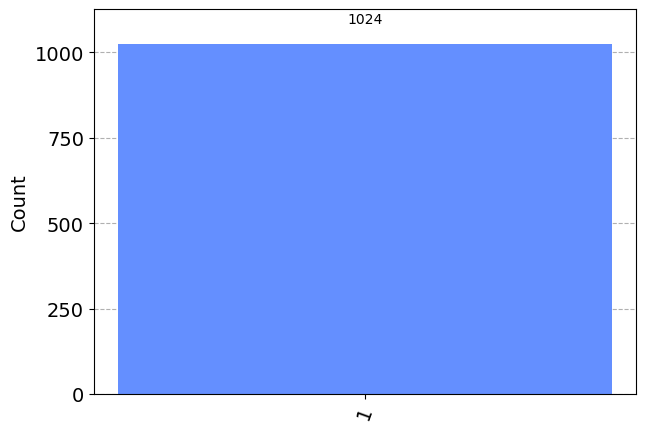

In [8]:
qc=QuantumCircuit(2,1)
qc.i(0)
qc.x(1)

qc.h(0)
qc.h(1)
qc.barrier()

qc.cx(0,1)
qc.barrier()

qc.h(0)

qc.measure(0,0)

display(qc.draw('mpl'))

backend=Aer.get_backend('aer_simulator')
result=execute(qc,backend=backend,shots=1024).result()
counts=result.get_counts(qc)
print(counts)
plot_histogram(counts)

# Trying the same with a different oracle. Lets use identity gates as oracles. We see that we get 0 after measurement since identity gate is a constant gate. 

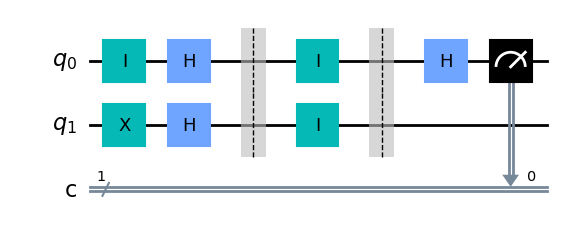

{'0': 1024}


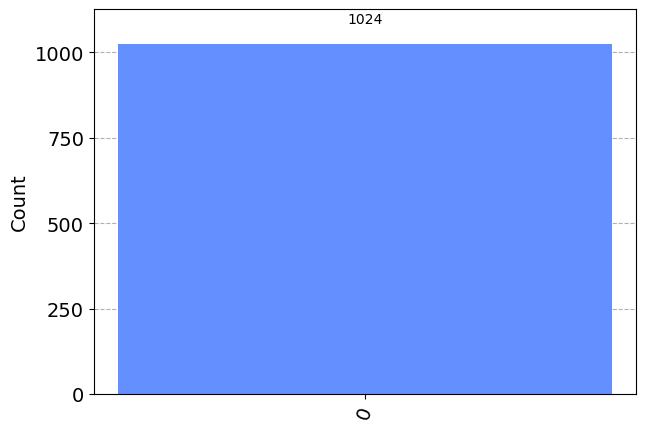

In [9]:
qc=QuantumCircuit(2,1)
qc.i(0)
qc.x(1)

qc.h(0)
qc.h(1)
qc.barrier()

qc.i(0)
qc.i(1)
qc.barrier()

qc.h(0)

qc.measure(0,0)

display(qc.draw('mpl'))

backend=Aer.get_backend('aer_simulator')
result=execute(qc,backend=backend,shots=1024).result()
counts=result.get_counts(qc)
print(counts)
plot_histogram(counts)

# Types of Oracles


In [10]:
# Constant oracle 1 has a function f such that f(0) = 0 and f(1) = 0. f gives 0 regardless. This is an identity function.
def ConstantOracle1(qc):
    qc.i(0)
    qc.i(1)
    return qc

In [11]:
# constant oracle 2 that has a function f such that f(0) = 1 and f(1) = 1. f gives 1 regardless
def ConstantOracle2(qc):
    qc.i(0)
    qc.x(1)
    return qc

In [12]:
# Balanced oracle 1 has a function such that f(0) = 0 and f(1) = 1. When first bit is 0 then f return 0 and when first bit is 1 then f returns 1. 
# Here f is a CX function. 
def BalancedOracle1(qc):
    qc.cx(0,1)
    return qc  

In [13]:
# Balanced oracle 2 has a function such that f(0) = 1 and f(1) = 0. When first bit is 0, f returns 1 and when first bit is 1, f returns 1. 
#  Here f is a combination of X gate on second qubit and then CX gate
def BalancedOracle2(qc):
    qc.x(1)
    qc.cx(0,1)
    return qc

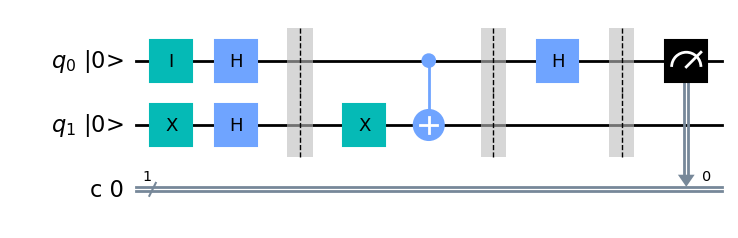

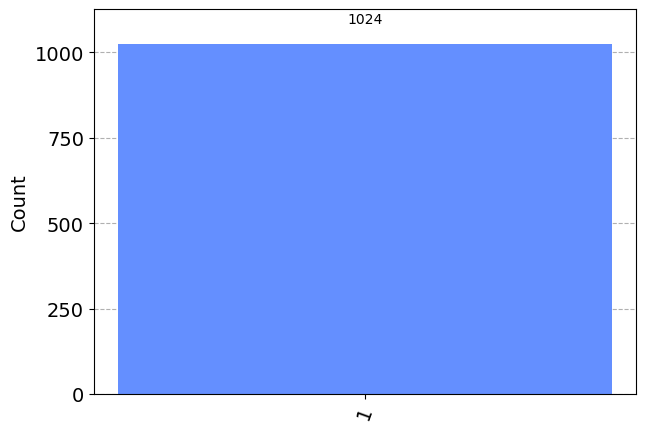

In [14]:
# first step is to have two registers, one register that holds values of x into a qubit(s) and then y register holds f(x) XOR y
# Put last qubit in in |1> state and create superpositions on all qubits

n = 2 # num qubits
num_cbits = 1

def prepare_state(n):
    qc = QuantumCircuit(n, num_cbits)
    qc.i(0)
    qc.x(1)
    qc.h(0)
    qc.h(1)
    return qc
qc = prepare_state(n)
qc.barrier()

# step two is to call the oracle (balanced or constant)
qc = BalancedOracle2(qc)
qc.barrier()

# step 3 is to put a Hadamard gate on first register of qubit(s)
def post_oracle_state(qc):
    qc.h(0)
    return qc
qc = post_oracle_state(qc)
qc.barrier()


# step 4 is measuring only the first register of qubit(s)
# if we get onlymeasure 0 state with 100% probability then it is constant function or else it is balanced function
qc.measure(0, 0)
backend = Aer.get_backend('aer_simulator')
counts = execute(qc, backend = backend, shots = 1024).result().get_counts()
 
display(qc.draw('mpl', initial_state=True))
plot_histogram(counts) 
